In [1]:
from lexicalrichness import LexicalRichness
import os
import pandas as pd
import csv
import glob
import numpy as np
import os
import sys
import sox
import shutil

from operator import itemgetter
from itertools import groupby
import numpy as np
import shutil 
import pandas as pd
from scipy import stats
import glob
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import seaborn as sns
import re
import spacy
import en_core_web_sm
import glob
from spacy.matcher import Matcher
import csv
import os
import sys

import shutil
from operator import itemgetter
from itertools import groupby
import numpy as np
import shutil 
import pandas as pd
from scipy import stats
import glob
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
import spacy
from scipy.stats import ranksums
import en_core_web_sm
import glob
from spacy.matcher import Matcher

2022-09-02 20:38:54.760164: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64::/home/smielke/cuda-cudnn/lib64
2022-09-02 20:38:54.760201: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [3]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista
    

In [4]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object


In [5]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected
    
    
    #return values
#val = np.array(values)
    #return statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)

In [9]:
input_dir = '/export/c12/afavaro/Transcriptions/CTP//'
#input_dir = '/export/c12/afavaro/CTP_transc_updated/' --> PREV VERSION
#label_seneca = pd.read_excel("/export/b14/afavaro/Acoustic_Features/DigiPsych_Prosody/Hospital_Analysis/labels_new.xlsx")

In [10]:

#label_seneca[:44]

In [11]:
path = []
for ok in os.listdir(input_dir):
    if ok.endswith('.txt'):
        path.append(os.path.join(input_dir, ok))
len(path)   

149

In [12]:
transcr = []
for file in path:
    with open(file, "r") as f:
        string_without_line_breaks = ""
        for line in f:
            stripped_line = line.rstrip()
            string_without_line_breaks += stripped_line
        transcr.append(string_without_line_breaks)
            

        

       # lines = f.readlines()[0]
       # transcr.append(mylist)


In [13]:
speaker = [os.path.basename(file).split("_ses")[0] for file in path]
dataframe = {'idx':speaker, 'sentence': transcr}

In [14]:
df_10msec = pd.DataFrame(dataframe)
pd.set_option('display.max_colwidth', None)

In [15]:
label_seneca = pd.read_excel("/export/b14/afavaro/Acoustic_Features/DigiPsych_Prosody/Hospital_Analysis/Book3.xlsx")
label = label_seneca['Label'].tolist()
speak = label_seneca['Participant I.D.'].tolist() #id
spk2lab_ = {sp:lab for sp,lab in zip(speak,label)}
speak2__ = df_10msec['idx'].tolist()

In [16]:
etichettex = []
for nome in speak2__:
    if nome in spk2lab_.keys():
        lav = spk2lab_[nome]
        etichettex.append(([nome, lav]))
    else:
         etichettex.append(([nome, 'Unknown']))

In [17]:
label_new_ = []
for e in etichettex:
    label_new_.append(e[1])
df_10msec['label'] = label_new_

In [18]:
df = df_10msec

In [19]:
df


,idx,sentence,label
0,NLS_85,"Uhm, I see what looks like a a kitchen with a couple of kids. Uhm, one of them climbing on a stool to get to cookie jar. looks like uhm the adult female is washing and washing dishes and the sink is overflowing. Uhm, looks like she's wearing maybe an apron. uhm, the kids are one is a girl, one is a boy. uhm, I see curtains on the window. i see the uhm an adult woman's feet are in the the water, it looks like. and she looks clueless as to what the kids are up to.",PD
1,PEC_19,"you know when the minute is up, right? yeah. okay, family, so you just want me to talk about the picture? okay, a a mother's son and a daughter trying to get cookies out of the cookie jar. the boys standing on a ladder, the mother's drying the dishes from the sink. uhm, the little girl has one our left cause she wants a cookie out of the cookie jar and uhm the mother's busy washing the dishes and dish, uhm the dishwater is overflowing on the floor. a the cup of saucer beside the mother who's washing, drying the dishes the little girl's waving again for a cookie and little boy got a cookie in his hand that he wants to give her but a the lids off the cookie jar. i'm not sure he's going a ech cause he's about the fall off the stool that he's standing on. mother doesn't know that the dish fan's overflowing but she's busy drying dishes and they're more just.",CTRL
2,NLS_61,"ah the boy is standing on the stool, trying to get a cookie jar and he's falling from the stool. the girl wants a cookie but she's reaching out for it but she's trying to tell him to be quiet. the mother is washing and drying the uhm dishes. the sink is on and is overflowing to the floor. there are a couple of uhm dishes on top of the table, of the cabinet actually. the window has its a blinds open. the curtains are open. you can see outside in the garden. it looks like a shack house in the back. there are few trees. there some dots on the floor. there's some hay on the left that almost looks like an animal. Uhm, the woman is wearing some type of like very short heels. she is wearing in a dress. ah she is, she looks like she is smiling.",FND
3,PEC_5,"two children, boy standing on stool reaching for cookies in the cookie jar. Mom standing in water. water's running out the sink. she's drying dishes. Uhm, in front she's standing in front of the window. Uhm, a window outside is a garden or garden path. Uhm, there are bowls, utensils on the countertop. two walls, it's like a spoon and a plate. Uhm, a curtains. Uhm, a counter top has open, has drawer has doors on the counter. two doors.",CTRL
4,AD_9,that you want me to describe what they're doing? little boy on ah on a a stool reaching for cookies. little girl waiting for him to give him her cookie. the mother's drying dishes while she's drying dishes ah the sink is overflowing and uhm that's it. that's what a puddle of water on the floor. Is there more? she's standing at the window the curtains of her drawing. is there anything else?,AD
...,...,...,...
144,NLS_60,"woman's washing dishes but the sink's overflowing. the children are stealing cookies from the cookie jar but they're falling off the stool. Uhm uhm looks like a pretty day outside. there's the grass is cut short. Uhm, mom is wearing a dress and an apron which is very old school. uhm, i'm so worried that boy's gonna fall uhm off the stool. this is one of those and i each study pictures and i've seen it before. Uhm, that's all i can really. it's a kitchen of a home and uhm i don't know why she's drying the dish when she should be stopping the water that's running on the floor. yes.",MS
145,NLS_66,"Oh my gosh, like kids getting out of the cookie jar. he's doing, uhm that mom's still doing dishes and the water is overflowing. the girl wants a cookie, hey brother go up and get me a cookie and that chair is gonna just go and that mom on me and watching, that's terrible, and the dishes are so overflowing. she's not done. uhm, she's an old fashioned lady. she has 

In [20]:
def compute_lexical_diversity(transcript):
    
    lex = LexicalRichness(transcript)
   # word_count = lex.words
    unique_word_count =  lex.terms
    type_token_ratio = lex.ttr
   # root_type_token_ratio = lex.rttr
    corrected_type_token_ratio = lex.cttr
   # mean_segmental_type_token_ratio = lex.msttr(segment_window=12) #25
    moving_average_type_token_ratio = lex.mattr(window_size=13) #25
   # measure_textual_lexical_diversity= lex.mtld(threshold=0.72)
   # hypergeometric_distribution_diversity = lex.hdd(draws=13)
   # herdan_lexical_diversity_measure = lex.Herdan
    summer_lexical_diversity_measure=lex.Summer
    dugast_lexical_diversity_measure =lex.Dugast
   # maas_lexical_diversity_measure = lex.Maas
    
    return unique_word_count, type_token_ratio, corrected_type_token_ratio, moving_average_type_token_ratio, summer_lexical_diversity_measure, dugast_lexical_diversity_measure
    

           

In [21]:
def load_files(data):
    
    speakers = data['idx'].tolist()
    sentences = data['sentence'].tolist()
    labels = data['label'].tolist()
    lex_vals = np.array([compute_lexical_diversity(sent) for sent in sentences])
    names = ["unique_word_count", "type_token_ratio", "corrected_type_token_ratio", "moving_average_type_token_ratio", "summer_lexical_diversity_measure", "dugast_lexical_diversity_measure"]
    frame = pd.DataFrame({"speakers": speakers, "labels": labels, "sentences": sentences, **{name:val for name, val in zip(names,lex_vals.T)}})
    return frame
    


In [22]:
data_frame = load_files(df)

#data_frame.to_csv("/export/b14/afavaro/SLT_submission/Linguistic/lexical_rich.txt")

In [23]:
data_frame

,speakers,labels,sentences,unique_word_count,type_token_ratio,corrected_type_token_ratio,moving_average_type_token_ratio,summer_lexical_diversity_measure,dugast_lexical_diversity_measure
0,NLS_85,PD,"Uhm, I see what looks like a a kitchen with a couple of kids. Uhm, one of them climbing on a stool to get to cookie jar. looks like uhm the adult female is washing and washing dishes and the sink is overflowing. Uhm, looks like she's wearing maybe an apron. uhm, the kids are one is a girl, one is a boy. uhm, I see curtains on the window. i see the uhm an adult woman's feet are in the the water, it looks like. and she looks clueless as to what the kids are up to.",49.0,0.490000,3.464823,0.866259,0.889795,29.729580
1,PEC_19,CTRL,"you know when the minute is up, right? yeah. okay, family, so you just want me to talk about the picture? okay, a a mother's son and a daughter trying to get cookies out of the cookie jar. the boys standing on a ladder, the mother's drying the dishes from the sink. uhm, the little girl has one our left cause she wants a cookie out of the cookie jar and uhm the mother's busy washing the dishes and dish, uhm the dishwater is overflowing on the floor. a the cup of saucer beside the mother who's washing, drying the dishes the little girl's waving again for a cookie and little boy got a cookie in his hand that he wants to give her but a the lids off the cookie jar. i'm not sure he's going a ech cause he's about the fall off the stool that he's standing on. mother doesn't know that the dish fan's overflowing but she's busy drying dishes and they're more just.",89.0,0.491713,4.677736,0.893491,0.910930,38.069966
2,NLS_61,FND,"ah the boy is standing on the stool, trying to get a cookie jar and he's falling from the stool. the girl wants a cookie but she's reaching out for it but she's trying to tell him to be quiet. the mother is washing and drying the uhm dishes. the sink is on and is overflowing to the floor. there are a couple of uhm dishes on top of the table, of the cabinet actually. the window has its a blinds open. the curtains are open. you can see outside in the garden. it looks like a shack house in the back. there are few trees. there some dots on the floor. there's some hay on the left that almost looks like an animal. Uhm, the woman is wearing some type of like very short heels. she is wearing in a dress. ah she is, she looks like she is smiling.",81.0,0.522581,4.600491,0.881657,0.914873,39.194267
3,PEC_5,CTRL,"two children, boy standing on stool reaching for cookies in the cookie jar. Mom standing in water. water's running out the sink. she's drying dishes. Uhm, in front she's standing in front of the window. Uhm, a window outside is a garden or garden path. Uhm, there are bowls, utensils on the countertop. two walls, it's like a spoon and a plate. Uhm, a curtains. Uhm, a counter top has open, has drawer has doors on the counter. two doors.",50.0,0.595238,3.857584,0.836538,0.916344,37.841890
4,AD_9,AD,that you want me to describe what they're doing? little boy on ah on a a stool reaching for cookies. little girl waiting for him to give him her cookie. the mother's drying dishes while she's drying dishes ah the sink is overflowing and uhm that's it. that's what a puddle of water on the floor. Is there more? she's standing at the window the curtains of her drawing. is there anything else?,51.0,0.645570,4.057342,0.880597,0.928435,43.626840
...,...,...,...,...,...,...,...,...,...
144,NLS_60,MS,"woman's washing dishes but the sink's overflowing. the children are stealing cookies from the cookie jar but they're falling off the stool. Uhm uhm looks like a pretty day outside. there's the grass is cut short. Uhm, mom is wearing a dress and an apron which is very old school. uhm, i'm so worried that boy's gonna fall uhm off the stool. this is one of those and i each study pictures and i've seen it before. Uhm, that's all i can really. it's a kitchen of a home and uhm i don't know why she's drying the dish when s

In [25]:
#len(set(others['speakers']))

### LINGUISTIC FEATURES

In [26]:
df = data_frame

In [27]:
#load the Spacy model for extracting data for English: "en_core_web_sm" 
nlp = spacy.load('en_core_web_sm')

In [28]:
df['sentence'] = df['sentences'].str.lower()

In [29]:
# Create a function to preprocess the text

#Customized list of stopwords 
stopwords = ['a', 'an', 'the', 'with', 'to', 'be', 'have', 'for', 'has']

def preprocess(text):
    '''This is a function to perform tokenization, lemmatization, removal of non-alphabetic characters
    and stopword removal'''
  # Create Doc object
    doc = nlp(text, disable=['ner'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)

In [30]:
df['Item'] = df['sentence'].apply(preprocess)

In [31]:
def count_words(string):
    '''This function returns the number of words in a string'''
    # Split the string into words
    words = string.split()
    # Return the number of words
    return len(words)

#Application to the raw data to get the full word count

df['Word_Count'] = df['sentence'].apply(count_words)

#Application to the preprocessed data to get the content-word count

df['Word_Count_No_stop_words'] = df['Item'].apply(count_words)
#df.head()


In [32]:
def word_length(string):
    '''This function returns the average word length in characters for the words in an item'''
    #Get the length of the full text in characters
    chars = len(string)
    #Split the string into words
    words = string.split()
    #Compute the average word length and round the output to the second decimal point
    if len(words)!=0:
        avg_word_length = chars/len(words)
   
        return round(avg_word_length, 2)

#Application to the preprocessed data

#df['Avg_Word_Length'] = df['Item'].apply(word_length)
#df.head()

In [33]:
df['Avg_Word_Length'] = df['Item'].apply(word_length)

In [34]:
def sentence_counter(text):
    '''This function returns the number of sentences in an item'''
    doc = nlp(text)
    #Initialize a counter variable
    counter = 0
    #Update the counter for each sentence which can be found in the doc.sents object returned by the Spacy model
    for sentence in doc.sents:
        counter = counter + 1
    return counter

#Note that this function is applied to the raw text in order to identify sentence boundaries

df['Sentence_Count'] = df['sentence'].apply(sentence_counter)
#df.head()

In [35]:


def avg_sent_length(text):
    '''This function returns the average sentence length in an item'''
    doc = nlp(text)
    #Initialize a counter variable
    sent_number = 0
    #Update the counter for each sentence which can be found in the doc.sents object returned by the Spacy model
    for sent in doc.sents:
        sent_number = sent_number + 1
    #Get the number of words
    words = text.split()
    #Compute the average sentence length and round it to the second decimal point
    avg_sent_length = len(words)/sent_number
    return round(avg_sent_length, 2)

#Note that this function is applied to the raw text in order to identify sentence boundaries
df['Avg_Sent_Length_in_Words'] = df['sentence'].apply(avg_sent_length)
#df.head()

In [36]:
def nouns(text, model=nlp):
    '''This function returns the number of nouns in an item'''
    # Create doc object 
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of nouns
    return pos.count('NOUN')

df['Noun_Count'] = df['Item'].apply(nouns)
#df.head()

In [37]:
def verbs(text, model=nlp):
    '''This function returns the number of verbs in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of verbs
    return pos.count('VERB')

df['Verb_Count'] = df['Item'].apply(verbs)

#df.head()


In [38]:
def adjectives(text, model=nlp):
    '''This function returns the number of adjectives in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adjectives
    return pos.count('ADJ')

df['Adjective_Count'] = df['Item'].apply(adjectives)

#df.head()

In [39]:
def adverbs(text, model=nlp):
    '''This function returns the number of adverbs in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adverbs
    return pos.count('ADV')

df['Adverb_Count'] = df['Item'].apply(adverbs)
#df.head()

In [40]:
def numeral(text, model=nlp):
    '''This function returns the number of numerals (e.g., billion) in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adverbs
    return pos.count('NUM')

df['Numeral_Count'] = df['sentence'].apply(numeral) #meglio estrarlo dall'originale
#df.head()

In [41]:
def aux(text, model=nlp):
    '''This function returns the number of auxiliary in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adverbs
    return pos.count('AUX')

df['Auxiliary_Count'] = df['sentence'].apply(aux) #meglio estrarlo dall'originale
#df.head()

In [42]:
def get_nps(text):
    '''This is a function that outputs the number of noun phrases in an item'''
    doc = nlp(text)
    NP_count = 0
    for np in doc.noun_chunks:
        NP_count = NP_count + 1
    return NP_count
    #print(np)

df['Number_of_NPs'] = df['Item'].apply(get_nps)
#df.head()

In [44]:
def get_pps(text):
    '''This is a function that outputs the number of prepositional phrases in an item'''
    doc = nlp(text)
    pps = 0
    for token in doc:
        # You can try this with other parts of speech for different subtrees.
        if token.pos_ == 'ADP':
            
            #Use the command below if you wanted to get the actual PPs
            #pp = ' '.join([tok.orth_ for tok in token.subtree])
            
            #This command counts the number of PPs
            pps = pps + 1
            
    return pps

df['Number_of_PPs'] = df['Item'].apply(get_pps)
#df.head()

In [45]:
pattern = [{'POS': 'VERB', 'OP': '?'},
           {'POS': 'ADV', 'OP': '*'},
           {'POS': 'AUX', 'OP': '*'},
           {'POS': 'VERB', 'OP': '+'}]


def get_vps(text):
    '''This function returns the number of verb phrases in an item'''
    doc = nlp(text)
    vps = 0
    # instantiate a Matcher instance
    matcher = Matcher(nlp.vocab)
    matcher.add("Verb phrase", [pattern], on_match=None) #new syntax of the command
    # call the matcher to find matches 
    matches = matcher(doc)
    spans = [doc[start:end] for _, start, end in matches]
    for match in matches:
        vps = vps +1
    return vps
    
df['Number_of_VPs'] = df['Item'].apply(get_vps)
#df.head()

In [46]:

#Connectives to instruct, recount and sequence
temporal_connectives = ['afterwards', 'once', 'at this moment', 'at this point', 'before', 'finally', 
                        'here', 'in the end', 'lastly', 'later on', 'meanwhile', 'next', 'now', 
                        'on another occasion', 'previously','since', 'soon', 'straightaway', 'then', 
                        'when', 'whenever', 'while']


#Connectives to show cause or conditions
causal_connectives = ['accordingly', 'all the same', 'an effect of', 'an outcome of', 'an upshot of',
                      'as a consequence of', 'as a result of', 'because', 'caused by', 'consequently',
                      'despite this', 'even though', 'hence', 'however', 'in that case', 'moreover',
                      'nevertheless', 'otherwise', 'so', 'so as', 'stemmed from', 'still', 'then',
                      'therefore', 'though', 'under the circumstances', 'yet']


#Connectives for showing results
exemplifying_connectives = ['accordingly', 'as a result', 'as exemplified by', 'consequently', 'for example',
                            'for instance', 'for one thing', 'including', 'provided that', 'since', 'so',
                            'such as', 'then', 'therefore', 'these include', 'through', 'unless', 'without']


#Connectives to show similarity or add a point
additive_connectives = ['and', 'additionally', 'also', 'as well', 'even', 'furthermore', 'in addition', 'indeed',
                        'let alone', 'moreover', 'not only']

#Connectives showing a difference or an opposite point of view
contrastive_connectives = ['alternatively', 'anyway', 'but', 'by contrast', 'differs from', 'elsewhere',
                           'even so', 'however', 'in contrast', 'in fact', 'in other respects', 'in spite of this',
                           'in that respect', 'instead', 'nevertheless', 'on the contrary', 'on the other hand',
                           'rather', 'though', 'whereas', 'yet']

In [47]:
def temporal_connectives_count(text):
    '''This function counts the number of temporal connectives in a text'''
    count = 0
    for string in temporal_connectives:
        for match in re.finditer(string, text):
            count +=  1
    return count

#Note that we apply the function to the raw text (and remember that it is important to lowercase all words)
df['Temporal_Connectives_Count'] = df['sentence'].apply(temporal_connectives_count)
#df.head()

In [48]:
def causal_connectives_count(text):
    '''This function counts the number of causal connectives in a text'''
    count = 0
    for string in causal_connectives:
        for match in re.finditer(string, text):
            count +=  1
    return count

df['Causal_Connectives_Count'] = df['sentence'].apply(causal_connectives_count)
#df.head()?

In [49]:
def exemplifying_connectives_count(text):
    '''This function counts the number of exemplifying connectives in a text'''
    count = 0
    for string in exemplifying_connectives:
        for match in re.finditer(string, text):
            count +=  1
    return count

df['Exemplifying_Connectives_Count'] = df['sentence'].apply(exemplifying_connectives_count)
#df.head()

In [50]:
def additive_connectives_count(text):
    '''This function counts the number of additive connectives in a text'''
    count = 0
    for string in additive_connectives:
        for match in re.finditer(string, text):
            count +=  1
    return count

df['Additive_Connectives_Count'] = df['sentence'].apply(additive_connectives_count)
#df.head()

In [51]:
def contrastive_connectives_count(text):
    '''This function counts the number of contrastive connectives in a text'''
    cont_con = 0
    for string in contrastive_connectives:
        if string in text:
            cont_con = cont_con + 1
    return cont_con

df['Contrastive_Connectives_Count'] = df['sentence'].apply(contrastive_connectives_count)
#df.head()

In [52]:
filled_pause = ["uhm"]
    

def filled_pauses(text):
    
    cont_pauses = 0
    for string in filled_pause:
        for match in re.finditer(string, text):
            cont_pauses += 1
    return cont_pauses

df['Filled_Pauses'] = df['sentence'].apply(filled_pauses)
#df[:40]


In [ ]:
#df.to_csv("/export/b14/afavaro/SLT_submission/Linguistic/ling_CTP.txt")

In [53]:
def certanty(text):
    
    '''Function design to capture the level of certainty of patients in providing the description
    of the image. To operationalize uncertanty I chose modals verbs as cue and interrogative marks. '''
    
    cont_con = 0
    if "?" in text:
        cont_con = cont_con + 1
    if "why" in text:
        cont_con = cont_con + 1
    if "might" in text:
        cont_con = cont_con + 1
    if "can" in text:
        cont_con = cont_con + 1
    if "may" in text:
        cont_con = cont_con + 1
    if "sure" in text:
        cont_con = cont_con + 1     
   # if "I" in text:
      #  cont_con = cont_con + 1 
    if "uhm" in text:
        cont_con = cont_con + 1 
    if "ah" in text:
        cont_con = cont_con + 1 
    if "should" in text:
        cont_con = cont_con + 1 
    if "looks like" in text:
        cont_con = cont_con + 1
        
    
    return cont_con

df['certanty'] = df['sentence'].apply(certanty)

In [54]:

def repetitions(text):
     
    '''Function design to capture the redundancy in the code.  To operationalize 
    redundancy I chose to count the repetitions. '''
    
    
    repetition = 0
    
    text = text.split()
    d = dict()
    
    for line in text:
        line = line.strip()
        line = line.lower()
        words = line.split(" ")
        for word in words:

            if word in d:
                d[word] = d[word] + 1
            else:
                d[word] = 1
    
    for key in list(d.keys()):
        if key != 'the' and key != "a" and key != "of" and key != "to" and key !="on" and key !="is" and key !="are" and key !="in" and key != "an":
            if d[key] > 1:
                repetition +=1

    return repetition


df['repetition'] = df['sentence'].apply(repetitions)


In [55]:
def informational_verb(text):
    
    '''Exhaustivness of the description operationalized by 
    counting how many (if any) salient items (nouns) are mentioned. '''
    
    cont_con = 0
    
    if "washing" in text:
        cont_con = cont_con + 1
    if "overflowing" in text:
        cont_con = cont_con + 1
    if "hanging" in text:
        cont_con = cont_con + 1
    if "falling" in text:
        cont_con = cont_con + 1
    if "wearing" in text:
        cont_con = cont_con + 1
    if "running" in text:
        cont_con = cont_con + 1
    if "drying" in text:
        cont_con = cont_con + 1
    if "paying attention" in text:
        cont_con = cont_con + 1
    if "reaching" in text:
        cont_con = cont_con + 1
    if "tipping" in text:
        cont_con = cont_con + 1

    
    return cont_con

df['informational_verb'] = df['sentence'].apply(informational_verb)

In [56]:
def informational_content(text):

    '''Exhaustivness of the description operationalized by 
    counting how many (if any) salient actions (verbs) are mentioned. '''

    
    cont_con = 0
    
    if "mother" in text:
        cont_con = cont_con + 1
    if "sister" in text:
        cont_con = cont_con + 1
    if "cookie" in text:
        cont_con = cont_con + 1
    if "cookie jar" in text:
        cont_con = cont_con + 1
    if "curtains" in text:
        cont_con = cont_con + 1
    if "cabinet" in text:
        cont_con = cont_con + 1
    if "brother" in text:
        cont_con = cont_con + 1
    if "kitchen" in text:
        cont_con = cont_con + 1
    if "sink" in text:
        cont_con = cont_con + 1
    if "garden" in text:
        cont_con = cont_con + 1
    if "fall" in text:
        cont_con = cont_con + 1
    if "dishes" in text:
        cont_con = cont_con + 1     
    if "stool" in text:
        cont_con = cont_con + 1 
    if "poddle" in text:
        cont_con = cont_con + 1 
    
    return cont_con

df['informational'] = df['sentence'].apply(informational_content)

In [57]:
#df = df.rename(columns={"Word_Count_No_stop_words": "# tokens\nCTP task"})
#df = df.rename(columns={"Sentence_Count": "# sentence(s)\nCTP task"})
#df = df.rename(columns={"Temporal_Connectives_Count": "# temporal connective(s)\nCTP task"})
#df = df.rename(columns={"Avg_Word_Length": "Word length [char]\nCTP task"})
##combined_csv_data = combined_csv_data.rename(columns={"F0std":"F0 [Hz] (σ)\nCTP task"})
#df = df.rename(columns={"Number_of_NPs": "# NP(s)\nCTP task"})
#df = df.rename(columns={"Number_of_PPs": "# PP(s)\nCTP task"})

In [58]:
df =df.drop(columns=['sentence', 'Item']) 

In [59]:
df

,speakers,labels,sentences,unique_word_count,type_token_ratio,corrected_type_token_ratio,moving_average_type_token_ratio,summer_lexical_diversity_measure,dugast_lexical_diversity_measure,Word_Count,...,Temporal_Connectives_Count,Causal_Connectives_Count,Exemplifying_Connectives_Count,Additive_Connectives_Count,Contrastive_Connectives_Count,Filled_Pauses,certanty,repetition,informational_verb,informational
0,NLS_85,PD,"Uhm, I see what looks like a a kitchen with a couple of kids. Uhm, one of them climbing on a stool to get to cookie jar. looks like uhm the adult female is washing and washing dishes and the sink is overflowing. Uhm, looks like she's wearing maybe an apron. uhm, the kids are one is a girl, one is a boy. uhm, I see curtains on the window. i see the uhm an adult woman's feet are in the the water, it looks like. and she looks clueless as to what the kids are up to.",49.0,0.490000,3.464823,0.866259,0.889795,29.729580,98,...,0,0,0,3,0,7,3,12,3,7
1,PEC_19,CTRL,"you know when the minute is up, right? yeah. okay, family, so you just want me to talk about the picture? okay, a a mother's son and a daughter trying to get cookies out of the cookie jar. the boys standing on a ladder, the mother's drying the dishes from the sink. uhm, the little girl has one our left cause she wants a cookie out of the cookie jar and uhm the mother's busy washing the dishes and dish, uhm the dishwater is overflowing on the floor. a the cup of saucer beside the mother who's washing, drying the dishes the little girl's waving again for a cookie and little boy got a cookie in his hand that he wants to give her but a the lids off the cookie jar. i'm not sure he's going a ech cause he's about the fall off the stool that he's standing on. mother doesn't know that the dish fan's overflowing but she's busy drying dishes and they're more just.",89.0,0.491713,4.677736,0.893491,0.910930,38.069966,168,...,3,2,2,8,1,3,4,23,3,7
2,NLS_61,FND,"ah the boy is standing on the stool, trying to get a cookie jar and he's falling from the stool. the girl wants a cookie but she's reaching out for it but she's trying to tell him to be quiet. the mother is washing and drying the uhm dishes. the sink is on and is overflowing to the floor. there are a couple of uhm dishes on top of the table, of the cabinet actually. the window has its a blinds open. the curtains are open. you can see outside in the garden. it looks like a shack house in the back. there are few trees. there some dots on the floor. there's some hay on the left that almost looks like an animal. Uhm, the woman is wearing some type of like very short heels. she is wearing in a dress. ah she is, she looks like she is smiling.",81.0,0.522581,4.600491,0.881657,0.914873,39.194267,151,...,4,3,3,4,1,3,4,16,6,10
3,PEC_5,CTRL,"two children, boy standing on stool reaching for cookies in the cookie jar. Mom standing in water. water's running out the sink. she's drying dishes. Uhm, in front she's standing in front of the window. Uhm, a window outside is a garden or garden path. Uhm, there are bowls, utensils on the countertop. two walls, it's like a spoon and a plate. Uhm, a curtains. Uhm, a counter top has open, has drawer has doors on the counter. two doors.",50.0,0.595238,3.857584,0.836538,0.916344,37.841890,80,...,1,0,0,4,0,5,1,7,3,7
4,AD_9,AD,that you want me to describe what they're doing? little boy on ah on a a stool reaching for cookies. little girl waiting for him to give him her cookie. the mother's drying dishes while she's drying dishes ah the sink is overflowing and uhm that's it. that's what a puddle of water on the floor. Is there more? she's standing at the window the curtains of her drawing. is there anything else?,51.0,0.645570,4.057342,0.880597,0.928435,43.626840,73,...,3,0,0,2,0,1,3,11,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NLS_60,MS,"woman's washing dishes but the sink's overflowing. the children are stealing cookies from the cookie jar but 

In [77]:
df.to_csv('/export/b15/afavaro/Frontiers/submission/Classification/NLS_Data_set/ling_cognitive_tog.csv')

In [63]:
grouped = df.groupby('labels')
control = grouped.get_group("CTRL") 
parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")

others =  pd.concat([ grouped.get_group('CBS'),  
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD'), 
                      grouped.get_group('PSP'), grouped.get_group('MIM')])

#grouped.get_group('MS'),

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [65]:
parkinson_

,speakers,labels,sentences,unique_word_count,type_token_ratio,corrected_type_token_ratio,moving_average_type_token_ratio,summer_lexical_diversity_measure,dugast_lexical_diversity_measure,Word_Count,Word_Count_No_stop_words,Avg_Word_Length,Sentence_Count,Avg_Sent_Length_in_Words,Noun_Count,Verb_Count,Adjective_Count,Adverb_Count,Numeral_Count,Auxiliary_Count,Number_of_NPs,Number_of_PPs,Number_of_VPs,Temporal_Connectives_Count,Causal_Connectives_Count,Exemplifying_Connectives_Count,Additive_Connectives_Count,Contrastive_Connectives_Count,Filled_Pauses,certanty,repetition,informational_verb,informational
0,NLS_85,PD,"Uhm, I see what looks like a a kitchen with a couple of kids. Uhm, one of them climbing on a stool to get to cookie jar. looks like uhm the adult female is washing and washing dishes and the sink is overflowing. Uhm, looks like she's wearing maybe an apron. uhm, the kids are one is a girl, one is a boy. uhm, I see curtains on the window. i see the uhm an adult woman's feet are in the the water, it looks like. and she looks clueless as to what the kids are up to.",49.0,0.490000,3.464823,0.866259,0.889795,29.729580,98,70,4.76,8,12.25,26,11,2,1,3,8,22,9,11,0,0,0,3,0,7,3,12,3,7
6,NLS_46,PD,"kid's trying to climb up to get into the cookie jar and another kid's waiting for him to give her the cookie. the stool is falling over that he's on. mom isn't paying attention, she's doing the dishes and the water's running out of the sink cause she forgot to put a plug in. Uhm, there is dishes on the counter, cabinets, water falling out of the sink onto the floor. she has an apron on. mom does uhm. this curtain's in the windows, the yard outside. Uhm, faucet, uhm door handlers, countertops, uhm, floor.",63.0,0.617647,4.410882,0.930769,0.928162,44.393281,95,74,4.99,8,11.88,25,14,1,1,0,6,23,14,19,1,0,0,3,0,5,1,11,3,7
8,NLS_2,PD,"there's a boy and the cookie jar in the kitchen. the kitchen sink is overflowing. Uhm, the mother's still doing dishes, doesn't seem the care. Uhm, there's cup and saucer on the counter. outside there's shrubbery. Uhm, the girl wants a cookie and the boy is not gonna give it to her. i can tell he is gonna fall off the chair. Uhm, the girl, the mother is standing and the standing water from the sink. Uhm, there is a kitchen cabinet, there's a curtain, kitchen cabinets said. that's about it. you want to talk for more, then? i'm done.",60.0,0.555556,4.082483,0.878205,0.913104,37.296445,100,76,5.21,12,8.33,29,13,0,7,0,9,25,6,17,6,2,1,6,0,5,3,8,1,8
9,AD_5,PD,"Ah, okay. Uhm, a lady uhm dish washing dishes. Sink overflowing on the floor. Window is open. You see a driveway. Uhm, the type of the roof and the house and curtains. pens on, cups on, glass on the counter, doors on the cabinets. The boy is on a stool is turning over. he is got his hands in a cookie jar. There is cookies. There is a cookie jar lid. There is a girl that's waiting for handle a cookie down. The girl's wearing a dress and some type of little slipper shoe. And, uhm there is a faucet on the sink. Uhm, a tree and a window. Bushes in front of the window.",62.0,0.529915,4.053067,0.835165,0.908297,35.711635,115,85,5.05,15,7.67,42,6,3,3,0,5,28,14,8,4,1,1,7,0,5,2,8,3,7
12,NLS_22,PD,"family scene in the kitchen. there's an eminent disaster of water spilling over the sink as mom dries or washes the dishes. She's, the kids are behind her and an even bigger disaster is occurring as the little boy is starting to fall over on the stool. the little girl is hoping she'll get some cookies. he's reaching for the cookies in the cookie jar, designated as in fact the cookie jar. the cabinet opened only one thing in the entire cabinet, it would be the cookie jar. she mamma is standing in the water, one would think there could be some concerns. the window appears to be open. they're looking out on the sis, she's looking out on a scene standing in her uhm missus cleaver. ah ensemble of a nice sleeveless dress and high heels and apron, what we all do to wash dishes. she 

In [66]:
parkinson_ = parkinson_[~parkinson_.speakers.str.contains("NLS_102")]
parkinson_ = parkinson_[~parkinson_.speakers.str.contains("NLS_98")]
parkinson_ = parkinson_[~parkinson_.speakers.str.contains("NLS_95")]
parkinson_ = parkinson_[~parkinson_.speakers.str.contains("NLS_87")]
parkinson_ = parkinson_[~parkinson_.speakers.str.contains("NLS_85")]
parkinson_ = parkinson_[~parkinson_.speakers.str.contains("NLS_57")]
parkinson_ = parkinson_[~parkinson_.speakers.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.speakers.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.speakers.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.speakers.str.contains("NLS_21")]

In [67]:
#(set(control['idx']))

In [48]:
control

,speakers,labels,sentences,unique_word_count,type_token_ratio,corrected_type_token_ratio,moving_average_type_token_ratio,summer_lexical_diversity_measure,dugast_lexical_diversity_measure,sentence
1,PEC_19,CTRL,"you know when the minute is up, right? yeah. okay, family, so you just want me to talk about the picture? okay, a a mother's son and a daughter trying to get cookies out of the cookie jar. the boys standing on a ladder, the mother's drying the dishes from the sink. uhm, the little girl has one our left cause she wants a cookie out of the cookie jar and uhm the mother's busy washing the dishes and dish, uhm the dishwater is overflowing on the floor. a the cup of saucer beside the mother who's washing, drying the dishes the little girl's waving again for a cookie and little boy got a cookie in his hand that he wants to give her but a the lids off the cookie jar. i'm not sure he's going a ech cause he's about the fall off the stool that he's standing on. mother doesn't know that the dish fan's overflowing but she's busy drying dishes and they're more just.",89.0,0.491713,4.677736,0.893491,0.910930,38.069966,"you know when the minute is up, right? yeah. okay, family, so you just want me to talk about the picture? okay, a a mother's son and a daughter trying to get cookies out of the cookie jar. the boys standing on a ladder, the mother's drying the dishes from the sink. uhm, the little girl has one our left cause she wants a cookie out of the cookie jar and uhm the mother's busy washing the dishes and dish, uhm the dishwater is overflowing on the floor. a the cup of saucer beside the mother who's washing, drying the dishes the little girl's waving again for a cookie and little boy got a cookie in his hand that he wants to give her but a the lids off the cookie jar. i'm not sure he's going a ech cause he's about the fall off the stool that he's standing on. mother doesn't know that the dish fan's overflowing but she's busy drying dishes and they're more just."
3,PEC_5,CTRL,"two children, boy standing on stool reaching for cookies in the cookie jar. Mom standing in water. water's running out the sink. she's drying dishes. Uhm, in front she's standing in front of the window. Uhm, a window outside is a garden or garden path. Uhm, there are bowls, utensils on the countertop. two walls, it's like a spoon and a plate. Uhm, a curtains. Uhm, a counter top has open, has drawer has doors on the counter. two doors.",50.0,0.595238,3.857584,0.836538,0.916344,37.841890,"two children, boy standing on stool reaching for cookies in the cookie jar. mom standing in water. water's running out the sink. she's drying dishes. uhm, in front she's standing in front of the window. uhm, a window outside is a garden or garden path. uhm, there are bowls, utensils on the countertop. two walls, it's like a spoon and a plate. uhm, a curtains. uhm, a counter top has open, has drawer has doors on the counter. two doors."
4,NLS_6,CTRL,"Now? Uhm, okay. mom washing the dishes or lady washing the dishes. the window is open. she's looking outside. the sink is overflowing. there is cups and dishes there. Uhm, boy is on a step stool graining the cookie jar with a girl reaching her hand up for the cookies. there is uhm a shrubbery outside the window. some of the counter uhm cupboards have long handles on them. the water starting spill over the floor. the little boy, well young boy, has short on and a t-shirt and shoes and socks. the girl has it looks like a dress with shoes and socks on. mom has an apron on and she's drying the dishes. the curtains are pulled back so the breeze can blow in. uhm, the stool is starting to wobble to the.",77.0,0.562044,4.651740,0.883692,0.921827,42.011873,"now? uhm, okay. mom washing the dishes or lady washing the dishes. the window is open. she's looking outside. the sink is overflowing. there is cups and dishes there. uhm, boy is on a step stool graining the cookie jar with a girl reaching her hand up for the cookies. there is uhm a 

In [68]:
task = df.columns[9:].values.tolist()
task

['Word_Count',
 'Word_Count_No_stop_words',
 'Avg_Word_Length',
 'Sentence_Count',
 'Avg_Sent_Length_in_Words',
 'Noun_Count',
 'Verb_Count',
 'Adjective_Count',
 'Adverb_Count',
 'Numeral_Count',
 'Auxiliary_Count',
 'Number_of_NPs',
 'Number_of_PPs',
 'Number_of_VPs',
 'Temporal_Connectives_Count',
 'Causal_Connectives_Count',
 'Exemplifying_Connectives_Count',
 'Additive_Connectives_Count',
 'Contrastive_Connectives_Count',
 'Filled_Pauses',
 'certanty',
 'repetition',
 'informational_verb',
 'informational']

In [70]:
alzheimer

,speakers,labels,sentences,unique_word_count,type_token_ratio,corrected_type_token_ratio,moving_average_type_token_ratio,summer_lexical_diversity_measure,dugast_lexical_diversity_measure,Word_Count,Word_Count_No_stop_words,Avg_Word_Length,Sentence_Count,Avg_Sent_Length_in_Words,Noun_Count,Verb_Count,Adjective_Count,Adverb_Count,Numeral_Count,Auxiliary_Count,Number_of_NPs,Number_of_PPs,Number_of_VPs,Temporal_Connectives_Count,Causal_Connectives_Count,Exemplifying_Connectives_Count,Additive_Connectives_Count,Contrastive_Connectives_Count,Filled_Pauses,certanty,repetition,informational_verb,informational
4,AD_9,AD,that you want me to describe what they're doing? little boy on ah on a a stool reaching for cookies. little girl waiting for him to give him her cookie. the mother's drying dishes while she's drying dishes ah the sink is overflowing and uhm that's it. that's what a puddle of water on the floor. Is there more? she's standing at the window the curtains of her drawing. is there anything else?,51.0,0.645570,4.057342,0.880597,0.928435,43.626840,73,58,5.03,8,9.12,15,10,4,3,0,8,20,6,11,3,0,0,2,0,1,3,11,3,6
31,AD_1,AD,"a boy falls on stool. cookie jar in cabinet. little girl reaching to help. mom's in the kitchen with overflowing sink ah drying a dish and tea cups on a kitchen table kitchen counter. something on the kitchen counter looks like it might be a plate. ah, water coming down onto the floor from the sink overflowing. cookie jar with a lid. little boy with a cookie. little girl reaching for her brother. Uhm I am not sure what it is in the background with.",54.0,0.627907,4.117461,0.914761,0.926136,42.635962,85,65,5.45,10,8.50,30,6,6,0,0,5,20,9,7,0,1,1,1,0,1,5,10,3,8
38,AD_18,AD,"three people, a child, a female a male and a mother ah it seems that they're in the kitchen. the gentleman is taking a cookie from a cookie jar and he's on a a stool that's about to to fall over and the young girls' got her hand up and she's waiting to get her cookie. mom is drying the dishes, unfortunately, she's left the water on in the sink and water is pouring out onto the floor. on top of the counter there's two saucers and a plate and there's shelf a and drawers in the shells i'm sorry just drawers. and a the cookie yard drawer is open outside the window there's a bush. ah there's another window. there seem to be some mother bushes on the right. ah there's a.",77.0,0.534722,4.537269,0.874709,0.916033,39.454846,133,99,5.21,9,14.78,31,11,5,7,2,11,30,14,12,6,2,2,10,0,0,1,8,1,8
40,AD_11,AD,"Okay. and a mum's washing the dishes, a sink is overflowing, children are going for the cookie jar. a boy's about to kill over, a girl's going to help him and so to sink, the woman is drying dishes and there's the kitchen faucet is overflowing and the boy and girl want the cookies in the cookie jar. Lady is drying dishes and she's near an open window and the boy's about to fall on the floor and girl just wants a cookie.",45.0,0.505618,3.372893,0.893107,0.890249,29.543443,83,58,4.98,4,20.75,23,6,4,3,0,7,17,6,9,1,1,1,8,0,0,0,9,3,6
43,AD_10,AD,"So, what I do now? Okay, there's a cookie jar, a boy, a girl, a lady. Um, ah, the water. Sink I guess that's what that is. Um, so what we do now? Um, is that a toilette?",24.0,0.600000,2.683282,0.829670,0.885811,26.638898,38,30,4.33,6,6.33,6,3,0,5,0,3,9,0,3,3,2,2,0,0,0,2,6,0,3
47,AD_4,AD,"all right, so, the daughter and son are busy, getting up on a step-tool, getting into the cookie jar. probably while the mother is preoccupied with other things, maybe that the little girl has put the little boy up to it. Uhm, he seems to have gotten at least one cookie in a hand, maybe more, and sister, i assume that is his sister is ready, she's ready for it. meanwhile, the woman or mother has other problems in that. she seems to be washing the dishes and the sink is spilling spilling over onto the floor. i don't know why she doesn't seem to be paying attention at least to that, given that her feet seem to be in the water and she's uh

In [74]:
alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(df.columns[3:])])
others_all_feat = np.array([others[feat] for feat in np.array(df.columns[3:])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(df.columns[3:])])
control_all_feat = np.array([control[feat] for feat in np.array(df.columns[3:])])
#ataxia_all_feat= np.array([ataxia[feat] for feat in np.array(df.columns[18:])])

alzheimer_all_feat


array([[ 51.        ,  54.        ,  77.        ,  45.        ,
         24.        ,  83.        ,  73.        ,  46.        ,
         63.        ,  92.        ,  65.        ,  75.        ,
         57.        ,  75.        ,  42.        ,  82.        ,
         49.        ,  52.        ,  66.        ,  90.        ],
       [  0.64556962,   0.62790698,   0.53472222,   0.50561798,
          0.6       ,   0.61029412,   0.5703125 ,   0.82142857,
          0.525     ,   0.61744966,   0.61904762,   0.6097561 ,
          0.67058824,   0.51020408,   0.54545455,   0.57342657,
          0.5505618 ,   0.65      ,   0.5840708 ,   0.55555556],
       [  4.05734215,   4.1174614 ,   4.53726851,   3.3728926 ,
          2.68328157,   5.03261422,   4.5625    ,   4.34659144,
          4.06663251,   5.32941691,   4.48542614,   4.78182535,
          4.37170044,   4.37408883,   3.38445645,   4.84876165,
          3.67270528,   4.11096096,   4.39025469,   5.        ],
       [  0.88059701,   0.91476091,  

In [75]:
import numpy as np
from sklearn import metrics
import sklearn


def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))


In [76]:
#def kruskal(f, task, c, p, c_name, p_name):
#    for i, title in enumerate(task):
#        nome = title
#        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
#         
#
#with open('/export/b14/afavaro/SLT_submission/Linguistic/result/cd_pd_.txt', 'w') as f:
# 
#    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
#
#    
#
#with open('/export/b14/afavaro/SLT_submission/Linguistic/result/cd_otr.txt', 'w') as f:
#    
#    
#    kruskal(f, task, control_all_feat, others_all_feat, "control vs.", "others")
#    
#
#with open('/export/b14/afavaro/SLT_submission/Linguistic/result/pd_vs_otr.txt', 'w') as f:
#    
#    
#    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")
#    
#
#with open('/export/b14/afavaro/SLT_submission/Linguistic/result/ad_vs_otr.txt', 'w') as f:
#
#    
#    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
#    
#
#with open('/export/b14/afavaro/SLT_submission/Linguistic/result/ad_vs_cn.txt', 'w') as f:
#    #final_sub
#    
#    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
#    
#
#with open('/export/b14/afavaro/SLT_submission/Linguistic/result/ad_vs_pd.txt', 'w') as f:
#    #final_sub
#    
#    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")
#    

    
    


In [72]:
kruskal_1 = read_stats_test('/export/b14/afavaro/SLT_submission/Linguistic/result/ad_vs_cn.txt')
kruskal_2 = read_stats_test('/export/b14/afavaro/SLT_submission/Linguistic/result/ad_vs_otr.txt')
kruskal_3 = read_stats_test('/export/b14/afavaro/SLT_submission/Linguistic/result/ad_vs_pd.txt')
kruskal_4 = read_stats_test('/export/b14/afavaro/SLT_submission/Linguistic/result/cd_otr.txt')
kruskal_5 = read_stats_test('/export/b14/afavaro/SLT_submission/Linguistic/result/cd_pd_.txt')
kruskal_6 = read_stats_test('/export/b14/afavaro/SLT_submission/Linguistic/result/pd_vs_otr.txt')

In [80]:
kruskal_3

['kruskal results for Word_Count alzheimers vs. parkinson 0.13450114119762924 ',
 'kruskal results for Word_Count_No_stop_words alzheimers vs. parkinson 0.15966040132122838 ',
 'kruskal results for Avg_Word_Length alzheimers vs. parkinson 0.043452472971839115 ',
 'kruskal results for Sentence_Count alzheimers vs. parkinson 0.07488910682720032 ',
 'kruskal results for Avg_Sent_Length_in_Words alzheimers vs. parkinson 0.9138867951404632 ',
 'kruskal results for Noun_Count alzheimers vs. parkinson 0.12518920236564238 ',
 'kruskal results for Verb_Count alzheimers vs. parkinson 0.15866954965091318 ',
 'kruskal results for Adjective_Count alzheimers vs. parkinson 0.09112737102277141 ',
 'kruskal results for Adverb_Count alzheimers vs. parkinson 0.6615309095256132 ',
 'kruskal results for Numeral_Count alzheimers vs. parkinson 0.969412666115492 ',
 'kruskal results for Number_of_NPs alzheimers vs. parkinson 0.20650149931362985 ',
 'kruskal results for Number_of_PPs alzheimers vs. parkinson 0

In [74]:
holm_correction(kruskal_1)

([], [])

In [75]:
holm_correction(kruskal_2)

([], [])

In [76]:
holm_correction(kruskal_3)

([], [])

In [77]:
holm_correction(kruskal_4)

([], [])

In [78]:
holm_correction(kruskal_5)

([], [])

In [79]:
holm_correction(kruskal_6)

([], [])

In [180]:
def compute_best_scores(lista):    

    values = []
    critical = []
    final = [] 
    

    for l in lista:
       # print(l)
        ok = l.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(num)

    for value in values:
        if float(value) < 0.05:
            critical.append(value)

    for li in lista:
        for cri in critical:
            if cri in li:
                final.append(li)

    return final

In [181]:
kruskal = read_stats_test('/export/b14/afavaro/SLT_submission/linguistic_stats_update_2_all_.txt')
best = compute_best_scores(kruskal)

In [182]:
holm_correction(kruskal)

([], [])

In [256]:
az = (alzheimer['Number_of_NPs'].tolist())
az = np.array([x for x in az if x !='None'])
az = az.astype(float)
ctrl =(control['Word_Count_No_stop_words'].tolist())
ctrl = np.array([x for x in ctrl if x !='None'])
ctrl = ctrl.astype(float)

pd =(parkinson_['Temporal_Connectives_Count'].tolist())
pd = np.array([x for x in pd if x !='None'])
pd = pd.astype(float)

otr =(others['Temporal_Connectives_Count'].tolist())
otr = np.array([x for x in otr if x !='None'])
otr = otr.astype(float)


mean_az = np.mean(az)
st_ad = np.std(az)
mean_ctrl =  np.mean(ctrl)
st_ctrl = np.std(ctrl)


mean_pd = np.mean(pd)
st_pd = np.std(pd)


mean_otr = np.mean(otr)
st_otr = np.std(otr)


In [257]:
mean_ctrl

93.86363636363636

In [261]:
mean_az

73.91666666666667

In [ ]:
(H - k + 1)/(n - k)

In [ ]:
()

In [636]:
lista = []
for i in range(len(task)):
    m =[]
    for line in kruskal:
        if task[i] in line:
            m.append(line)
    lista.append(m)

In [639]:
Sentence_Count=[0.7739419047162636, 0.05372571117966594,0.01930343464003969, 0.6408690586248105,0.09600582106933613, 0.07488910682720032]

statsmodels.stats.multitest.fdrcorrection(np.array(Sentence_Count), alpha=0.05, method='indep', is_sorted=False)

(array([False, False, False, False, False, False]),
 array([0.7739419 , 0.14400873, 0.11582061, 0.76904287, 0.14400873,
        0.14400873]))

In [640]:
Sentence_Count=[0.01515251303903836, 0.05372571117966594,0.01930343464003969, 0.6408690586248105,0.09600582106933613, 0.07488910682720032]

statsmodels.stats.multitest.fdrcorrection(np.array(Sentence_Count), alpha=0.05, method='indep', is_sorted=False)

(array([False, False, False, False, False, False]),
 array([0.0579103 , 0.10745142, 0.0579103 , 0.64086906, 0.11520699,
        0.11233366]))

In [64]:
## EFFECT SIZE
# function to calculate Cohen's d for independent samples
#compute effect size
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
import numpy as np
import scipy.stats as st


def conf_interval(list_of_values):
    return st.t.interval(alpha=0.95, df=len(list_of_values)-1, loc=np.mean(list_of_values), scale=st.sem(list_of_values)) 
   

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [620]:
az = (alzheimer['Avg_Word_Length'].tolist())
az = np.array([x for x in az if x !='None'])
az = az.astype(float)
ctrl =(control['Avg_Word_Length'].tolist())
ctrl = np.array([x for x in ctrl if x !='None'])
ctrl = ctrl.astype(float)

pd =(parkinson_['Avg_Word_Length'].tolist())
pd = np.array([x for x in pd if x !='None'])
pd = pd.astype(float)
atx =(ataxia['Avg_Word_Length'].tolist())
atx = np.array([x for x in atx if x !='None'])
atx = atx.astype(float)
otr =(others['Avg_Word_Length'].tolist())
otr = np.array([x for x in otr if x !='None'])
otr = otr.astype(float)


mean_az = np.mean(az)
st_ad = np.std(az)
mean_ctrl =  np.mean(ctrl)
st_ctrl = np.std(ctrl)

mean_atx =  np.mean(atx)
st_atx = np.std(atx)

mean_pd = np.mean(pd)
st_pd = np.std(pd)


mean_otr = np.mean(otr)
st_otr = np.std(otr)


NameError: name 'ataxia' is not defined

In [89]:
cohend(ctrl, az)

0.9195728505931039

In [191]:
#compute_best_scores(t_test)

In [192]:
#import transformers

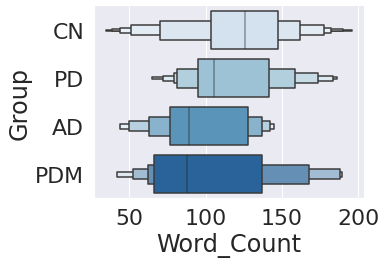

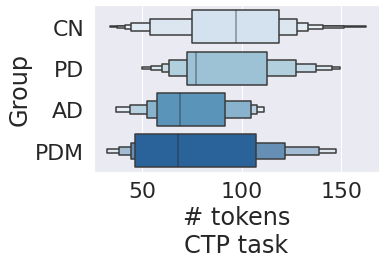

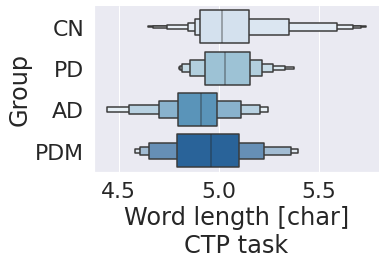

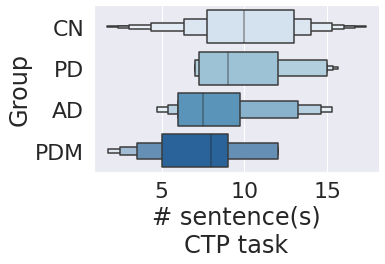

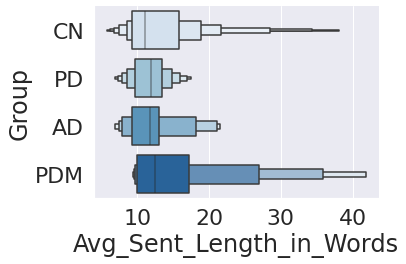

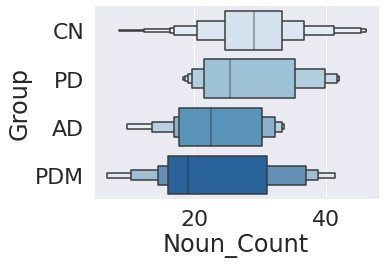

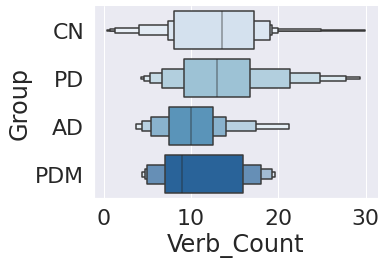

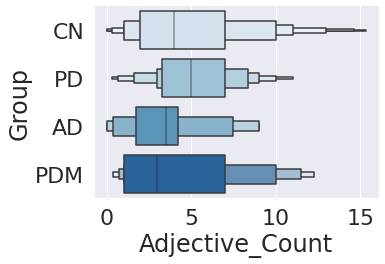

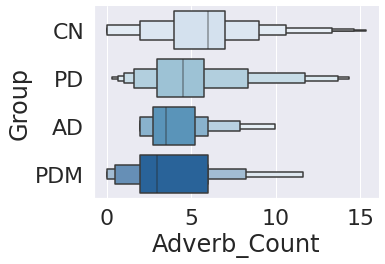

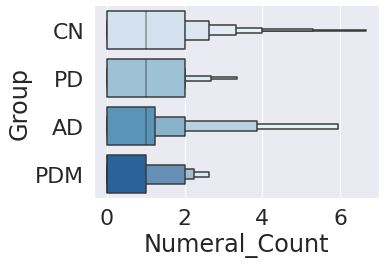

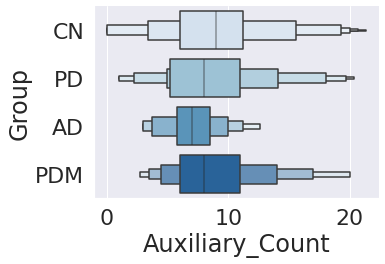

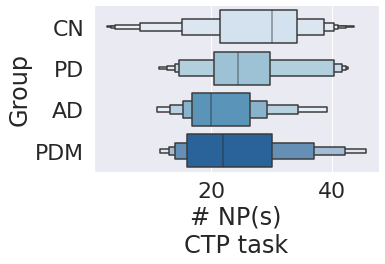

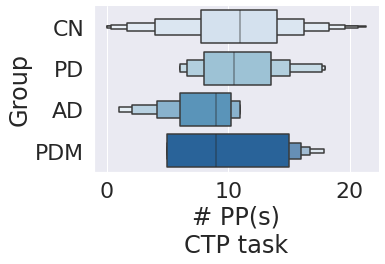

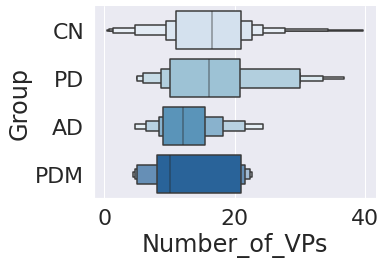

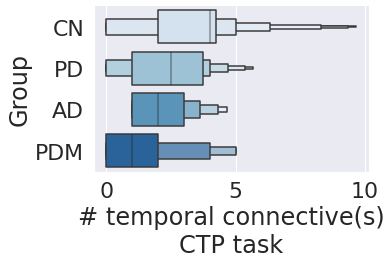

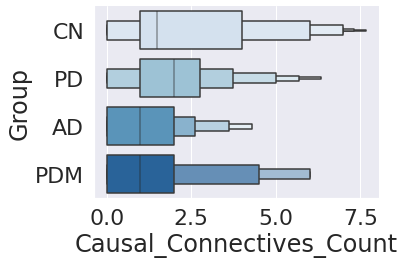

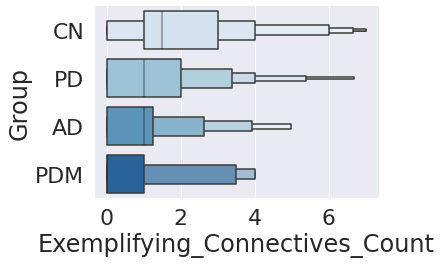

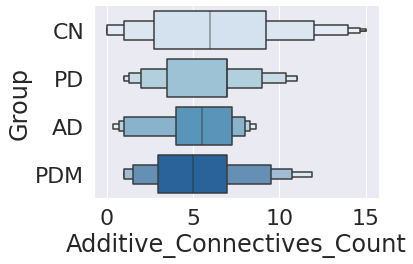

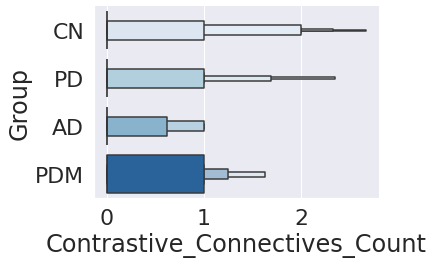

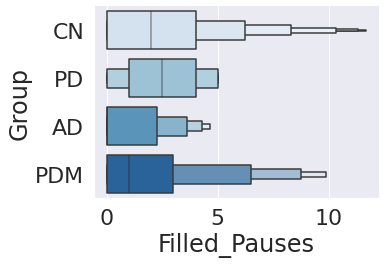

In [140]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    alz = []
    #ataxia = []
    others= []
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i], alzheimer_all_feat[i], others_all_feat[i]])
    data = data.tolist()

    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    #[ataxia.append('ATX') for value in range(len(ataxia_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    [alz.append('AD') for value in range(len(alzheimer_all_feat[i]))]
    [others.append('PDM') for value in range(len(others_all_feat[i]))]

    lista = controls+parkinson+alz+others
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    plt.savefig(f'/export/b14/afavaro/SLT_submission/Final_Plot/ling/{nome}', facecolor='white', dpi=600)

In [65]:
#compute effect size
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
import numpy as np
import scipy.stats as st


def conf_interval(list_of_values):
    return st.t.interval(alpha=0.95, df=len(list_of_values)-1, loc=np.mean(list_of_values), scale=st.sem(list_of_values)) 
   


def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [621]:
df

,speakers,labels,sentences,word_count,unique_word_count,type_token_ratio,root_type_token_ratio,corrected_type_token_ratio,mean_segmental_type_token_ratio,moving_average_type_token_ratio,measure_textual_lexical_diversity,hypergeometric_distribution_diversity,herdan_lexical_diversity_measure,summer_lexical_diversity_measure,dugast_lexical_diversity_measure,maas_lexical_diversity_measure,sentence,Item,Word_Count,Word_Count_No_stop_words,Avg_Word_Length,Sentence_Count,Avg_Sent_Length_in_Words,Noun_Count,Verb_Count,Adjective_Count,Adverb_Count,Numeral_Count,Auxiliary_Count,Number_of_NPs,Number_of_PPs,Number_of_VPs,Temporal_Connectives_Count,Causal_Connectives_Count,Exemplifying_Connectives_Count,Additive_Connectives_Count,Contrastive_Connectives_Count,Filled_Pauses
0,NLS_85,PD,"Uhm, I see what looks like a a kitchen with a couple of kids. Uhm, one of them climbing on a stool to get to cookie jar. looks like uhm the adult female is washing and washing dishes and the sink is overflowing. Uhm, looks like she's wearing maybe an apron. uhm, the kids are one is a girl, one is a boy. uhm, I see curtains on the window. i see the uhm an adult woman's feet are in the the water, it looks like. and she looks clueless as to what the kids are up to.",100.0,49.0,0.490000,4.900000,3.464823,0.927083,0.866259,30.845799,0.874192,0.845098,0.889795,29.729580,0.033637,"uhm, i see what looks like a a kitchen with a couple of kids. uhm, one of them climbing on a stool to get to cookie jar. looks like uhm the adult female is washing and washing dishes and the sink is overflowing. uhm, looks like she's wearing maybe an apron. uhm, the kids are one is a girl, one is a boy. uhm, i see curtains on the window. i see the uhm an adult woman's feet are in the the water, it looks like. and she looks clueless as to what the kids are up to.",uhm I see what look like kitchen couple of kid uhm one of they climb on stool get cookie jar look like uhm adult female wash and washing dish and sink overflow uhm look like she wear maybe apron uhm kid one girl one boy uhm I see curtain on window I see uhm adult woman foot in water it look like and she look clueless as what kid up,98,70,4.76,8,12.25,26,11,2,1,3,8,22,9,11,0,0,0,3,0,7
1,PEC_19,CTRL,"you know when the minute is up, right? yeah. okay, family, so you just want me to talk about the picture? okay, a a mother's son and a daughter trying to get cookies out of the cookie jar. the boys standing on a ladder, the mother's drying the dishes from the sink. uhm, the little girl has one our left cause she wants a cookie out of the cookie jar and uhm the mother's busy washing the dishes and dish, uhm the dishwater is overflowing on the floor. a the cup of saucer beside the mother who's washing, drying the dishes the little girl's waving again for a cookie and little boy got a cookie in his hand that he wants to give her but a the lids off the cookie jar. i'm not sure he's going a ech cause he's about the fall off the stool that he's standing on. mother doesn't know that the dish fan's overflowing but she's busy drying dishes and they're more just.",181.0,89.0,0.491713,6.615318,4.677736,0.905556,0.893491,50.775254,0.882208,0.863449,0.910930,38.069966,0.026267,"you know when the minute is up, right? yeah. okay, family, so you just want me to talk about the picture? okay, a a mother's son and a daughter trying to get cookies out of the cookie jar. the boys standing on a ladder, the mother's drying the dishes from the sink. uhm, the little girl has one our left cause she wants a cookie out of the cookie jar and uhm the mother's busy washing the dishes and dish, uhm the dishwater is overflowing on the floor. a the cup of saucer beside the mother who's washing, drying the dishes the little girl's waving again for a cookie and little boy got a cookie in his hand that he wants to give her but a the lids off the cookie jar. i'm not sure he's going a ech cause he's about the fall off the stool that he's standing on. mother doesn't know tha

In [50]:

from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=1.041e-01 stat=2.642e+00
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=1.448e-01 stat=2.126e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=8.083e-01 stat=5.884e-02
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=4.019e-01 stat=7.026e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=4.019e-01 stat=7.026e-01
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=1.151e-01 stat=2.483e+00
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=6.354e-01 stat=2.249e-01


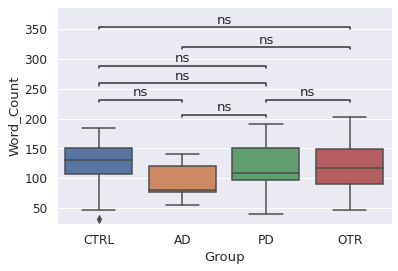

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=1.271e-01 stat=2.327e+00
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=1.700e-01 stat=1.883e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=9.381e-01 stat=6.027e-03
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=5.223e-01 stat=4.094e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=5.223e-01 stat=4.094e-01
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=1.934e-01 stat=1.691e+00
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=7.912e-01 stat=7.009e-02


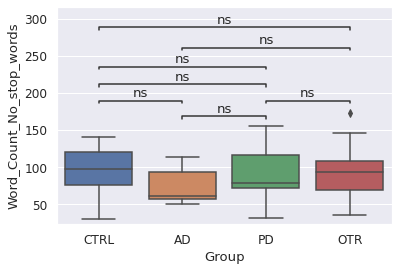

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=1.539e-01 stat=2.033e+00
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=5.062e-02 stat=3.821e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=7.858e-01 stat=7.384e-02
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=2.606e-01 stat=1.266e+00
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=2.606e-01 stat=1.266e+00
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=1.849e-01 stat=1.758e+00
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=8.727e-02 stat=2.924e+00


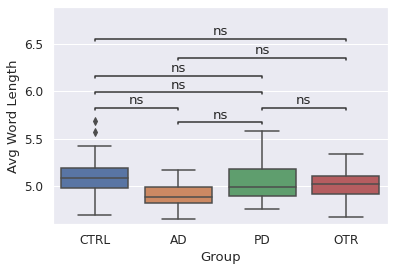

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=6.957e-02 stat=3.293e+00
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=2.743e-02 stat=4.863e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=6.535e-01 stat=2.015e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=8.601e-02 stat=2.948e+00
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=8.601e-02 stat=2.948e+00
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=6.222e-02 stat=3.477e+00
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=1.952e-01 stat=1.678e+00


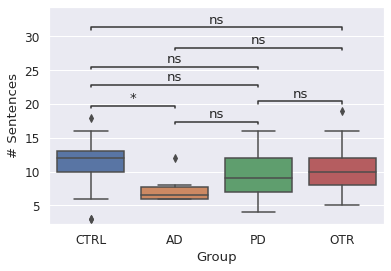

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=9.601e-01 stat=2.500e-03
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=5.795e-01 stat=3.071e-01
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=8.159e-01 stat=5.422e-02
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=4.020e-01 stat=7.023e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=4.020e-01 stat=7.023e-01
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=8.025e-01 stat=6.253e-02
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=4.735e-01 stat=5.137e-01


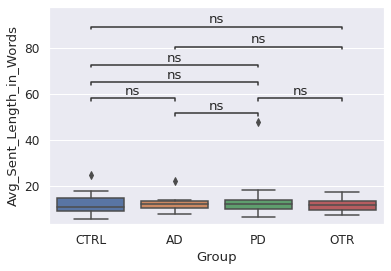

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=7.123e-02 stat=3.254e+00
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=3.551e-02 stat=4.420e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=8.383e-01 stat=4.163e-02
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=1.889e-01 stat=1.726e+00
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=1.889e-01 stat=1.726e+00
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=1.528e-01 stat=2.044e+00
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=2.080e-01 stat=1.585e+00


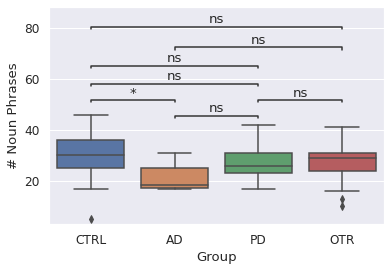

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=3.802e-01 stat=7.701e-01
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=6.397e-01 stat=2.192e-01
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=9.226e-01 stat=9.446e-03
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=4.391e-01 stat=5.986e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=4.391e-01 stat=5.986e-01
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=3.803e-01 stat=7.697e-01
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=6.987e-01 stat=1.498e-01


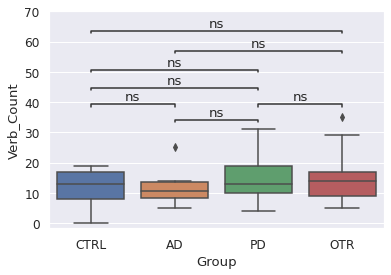

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=2.374e-01 stat=1.396e+00
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=3.947e-01 stat=7.244e-01
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=7.848e-01 stat=7.460e-02
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=6.979e-01 stat=1.506e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=6.979e-01 stat=1.506e-01
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=3.642e-01 stat=8.233e-01
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=8.939e-01 stat=1.778e-02


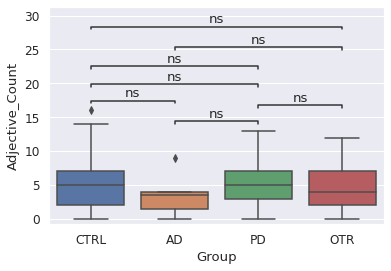

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=5.261e-01 stat=4.019e-01
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=5.979e-01 stat=2.781e-01
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=5.008e-01 stat=4.533e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=6.738e-01 stat=1.772e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=6.738e-01 stat=1.772e-01
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=4.332e-01 stat=6.142e-01
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=7.645e-01 stat=8.976e-02


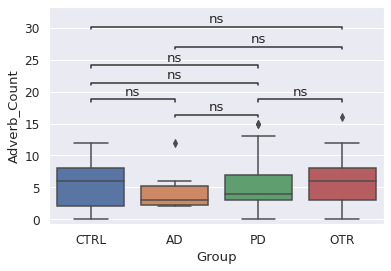

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=5.529e-01 stat=3.522e-01
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=4.411e-01 stat=5.934e-01
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=9.918e-01 stat=1.052e-04
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=6.728e-01 stat=1.783e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=6.728e-01 stat=1.783e-01
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=5.054e-01 stat=4.436e-01
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=7.370e-01 stat=1.128e-01


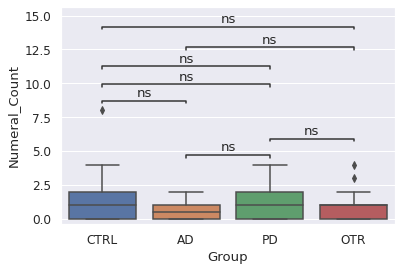

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=2.284e-01 stat=1.451e+00
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=2.406e-01 stat=1.377e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=8.003e-01 stat=6.398e-02
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=9.646e-01 stat=1.966e-03
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=9.646e-01 stat=1.966e-03
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=2.491e-01 stat=1.328e+00
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=6.579e-01 stat=1.960e-01


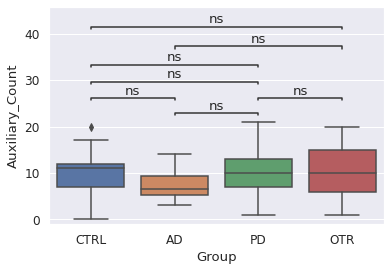

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=4.087e-01 stat=6.826e-01
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=2.669e-01 stat=1.232e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=9.535e-01 stat=3.396e-03
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=7.657e-01 stat=8.883e-02
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=7.657e-01 stat=8.883e-02
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=2.584e-01 stat=1.277e+00
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=6.426e-01 stat=2.154e-01


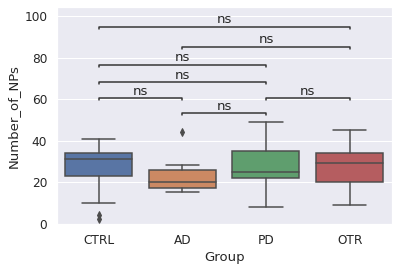

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=3.032e-01 stat=1.060e+00
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=2.067e-01 stat=1.595e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=9.612e-01 stat=2.371e-03
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=6.423e-01 stat=2.157e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=6.423e-01 stat=2.157e-01
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=2.693e-01 stat=1.220e+00
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=7.400e-01 stat=1.101e-01


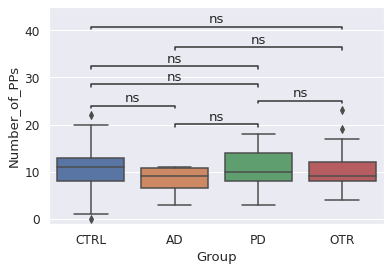

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=4.085e-01 stat=6.831e-01
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=7.476e-01 stat=1.036e-01
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=9.845e-01 stat=3.781e-04
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=4.526e-01 stat=5.642e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=4.526e-01 stat=5.642e-01
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=4.665e-01 stat=5.302e-01
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=5.284e-01 stat=3.974e-01


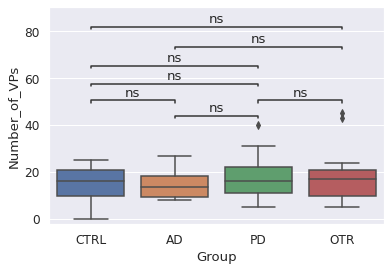

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=8.788e-01 stat=2.326e-02
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=2.462e-01 stat=1.345e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=3.986e-01 stat=7.126e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=1.070e-01 stat=2.598e+00
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=1.070e-01 stat=2.598e+00
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=4.759e-01 stat=5.082e-01
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=4.953e-01 stat=4.649e-01


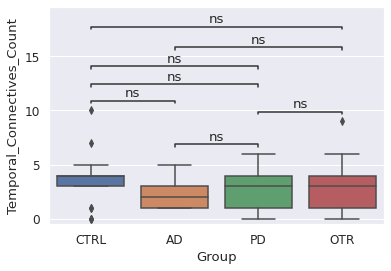

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=5.521e-01 stat=3.536e-01
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=6.935e-01 stat=1.554e-01
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=6.201e-01 stat=2.457e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=7.671e-01 stat=8.769e-02
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=7.671e-01 stat=8.769e-02
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=3.979e-01 stat=7.148e-01
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=4.773e-01 stat=5.051e-01


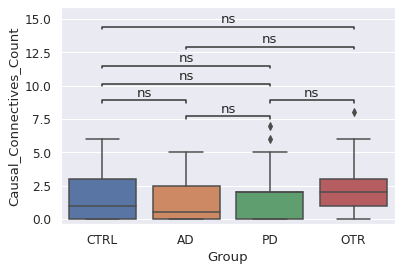

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=7.950e-01 stat=6.749e-02
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=7.397e-01 stat=1.104e-01
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=5.619e-01 stat=3.365e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=7.929e-01 stat=6.893e-02
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=7.929e-01 stat=6.893e-02
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=5.700e-01 stat=3.227e-01
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=7.856e-01 stat=7.401e-02


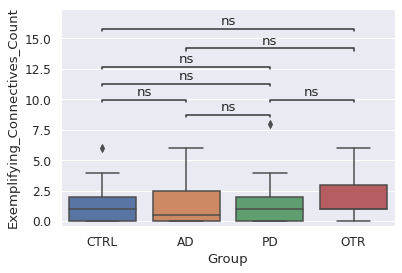

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=2.070e-01 stat=1.592e+00
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=2.537e-01 stat=1.303e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=7.183e-01 stat=1.301e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=4.992e-01 stat=4.566e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=4.992e-01 stat=4.566e-01
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=2.571e-01 stat=1.284e+00
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=9.558e-01 stat=3.067e-03


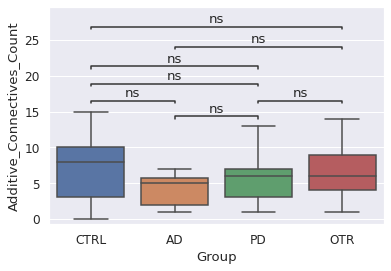

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=5.548e-01 stat=3.488e-01
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=6.689e-01 stat=1.829e-01
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=3.626e-01 stat=8.290e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=1.373e-01 stat=2.208e+00
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=1.373e-01 stat=2.208e+00
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=2.715e-01 stat=1.209e+00
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=2.594e-02 stat=4.960e+00


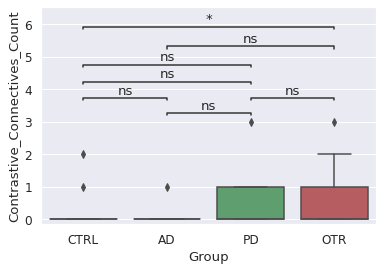

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AD v.s. PD: Kruskal-Wallis paired samples, P_val=9.798e-01 stat=6.430e-04
CTRL v.s. AD: Kruskal-Wallis paired samples, P_val=2.870e-01 stat=1.134e+00
PD v.s. OTR: Kruskal-Wallis paired samples, P_val=4.618e-01 stat=5.414e-01
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=1.061e-01 stat=2.611e+00
CTRL v.s. PD: Kruskal-Wallis paired samples, P_val=1.061e-01 stat=2.611e+00
AD v.s. OTR: Kruskal-Wallis paired samples, P_val=6.854e-01 stat=1.641e-01
CTRL v.s. OTR: Kruskal-Wallis paired samples, P_val=2.753e-01 stat=1.190e+00


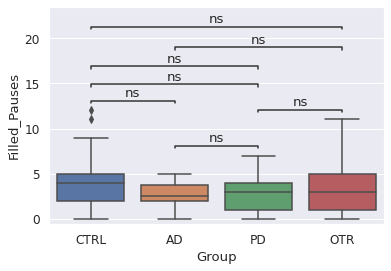

In [52]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    alz = []
    others= []
    
    data = np.concatenate([control_all_feat[i], alzheimer_all_feat[i], parkinson_all_feat[i], others_all_feat[i]])
    data = data.tolist()

    [controls.append('CTRL') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    [alz.append('AD') for value in range(len(alzheimer_all_feat[i]))]
    [others.append('OTR') for value in range(len(others_all_feat[i]))]

    lista = controls+alz+parkinson+others
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    
    
    
    y = nome
    x = "Group"
    order = ['CTRL', 'AD', 'PD', 'OTR']
    box_pairs=box_pairs=[
    ("AD", "PD"), ("PD", "CTRL"),
    ("CTRL", "PD"), ("AD", "CTRL"),
    ("AD", "OTR"), ("PD", "OTR"), ("OTR", "CTRL")]
    
    sns.set(font_scale=1.1)
    
    #ax = sns.catplot(x=x, y=y, kind="boxen",orient="v", data=df, palette="Blues")
    #sns.set(font_scale=1.1)
    ax = sns.boxplot(data=df, x=x, y=y, order=order, orient="v")
    
    test = add_stat_annotation(ax, data=df, x=x, y=y, order=order,box_pairs=box_pairs,
                                   test='Kruskal',  comparisons_correction=None,  text_format='star',
                                   loc='inside', verbose=2)
    
    #plt.show(test)
   # test_results
    
    plt.savefig(f'/export/b14/afavaro/Plots_AAIC/box_ling/{nome}', dpi=300, bbox_inches='tight')
    #
    plt.show(test)
    

In [ ]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    alz = []
    others= []
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i], alzheimer_all_feat[i], others_all_feat[i]])
    data = data.tolist()

    [controls.append('CTRL') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    [alz.append('AD') for value in range(len(alzheimer_all_feat[i]))]
    [others.append('OTR') for value in range(len(others_all_feat[i]))]

    lista = controls+parkinson+alz+others
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set_style("white")
    sns.kdeplot(x=nome, hue="Group",  data=df, fill=True, common_norm=False, palette="Pastel1",
       alpha=.5)
    
    #sns.set_context(font_scale=2.5)
    plt.gcf().set_size_inches(8, 6)
#sns.boxenplot(x='values', y='degree', data=df, order=['CTRL', 'PD', 'AD', 'OTR'])
  # plt.savefig(f'/export/b14/afavaro/Plots_AAIC/pdf_linguistic_cookie/{nome}')
    plt.show()
    

In [76]:
import torch
import numpy as np

In [74]:
aa = torch.rand(23,10)

In [77]:
ba = np.random.rand(23,10)

In [87]:
aab = torch.arange(25).reshape(5,5)
aab[:,::3] = 4
aab

tensor([[ 4,  1,  2,  4,  4],
        [ 4,  6,  7,  4,  9],
        [ 4, 11, 12,  4, 14],
        [ 4, 16, 17,  4, 19],
        [ 4, 21, 22,  4, 24]])

In [635]:
#pd.conca